<a href="https://colab.research.google.com/github/berilcankutlu/MediumBlogCodes/blob/main/Ke%C5%9Fif%C3%A7i_Veri_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
import os
data_path = kagglehub.dataset_download('uom190346a/sleep-health-and-lifestyle-dataset')

print('Data source import complete.')
csv_file_path = os.path.join(data_path, 'Sleep_health_and_lifestyle_dataset.csv')

100%|██████████| 2.54k/2.54k [00:00<00:00, 1.04MB/s]

Extracting files...
Data source import complete.


In [ ]:
# Gerekli kütüphanelerin eklenmesi
import pandas as pd
# Görselleştirme için
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Veriyi setini yükleme
df = pd.read_csv(csv_file_path)

In [ ]:
# İlk 5 satıra göz at
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Son 5 satıra göz at
df.tail(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
# Genel bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
# Özet istatistikler
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
# Eksik değer kontrolü
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
duplicate_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_df.shape)

number of duplicate rows:  (0, 13)


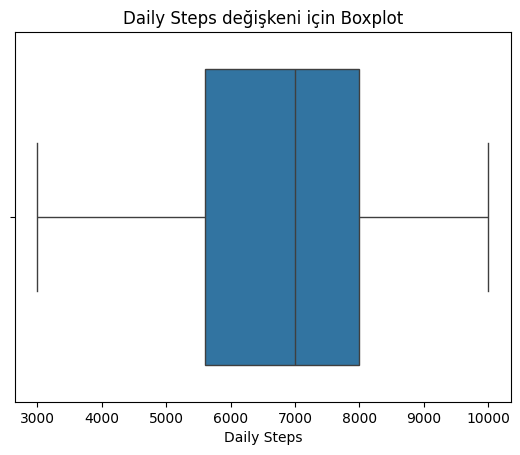

In [ ]:
# Aykırı değerleri tespit etmek için örnek bir sütunun boxplot'u
sns.boxplot(x=df['Daily Steps'])
plt.title('Daily Steps değişkeni için Boxplot')
plt.show()

In [ ]:
# Aykırı değerleri sayısal olarak bulmak istersen:
Q1 = df['Daily Steps'].quantile(0.25)
Q3 = df['Daily Steps'].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

# Aykırı değerler
outliers = df[(df['Daily Steps'] < alt_sinir) | (df['Daily Steps'] > ust_sinir)]

print("Aykırı Değer Sayısı:", outliers.shape[0])
print(outliers[['Daily Steps']])

Aykırı Değer Sayısı: 0
Empty DataFrame
Columns: [Daily Steps]
Index: []


tek değişkenli analiz

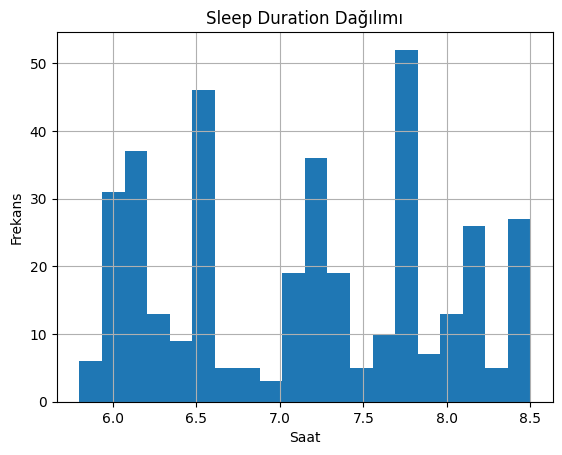

In [ ]:
# Sayısal sütun: Histogram
df['Sleep Duration'].hist(bins=20)
plt.title('Sleep Duration Dağılımı')
plt.xlabel('Saat')
plt.ylabel('Frekans')
plt.show()



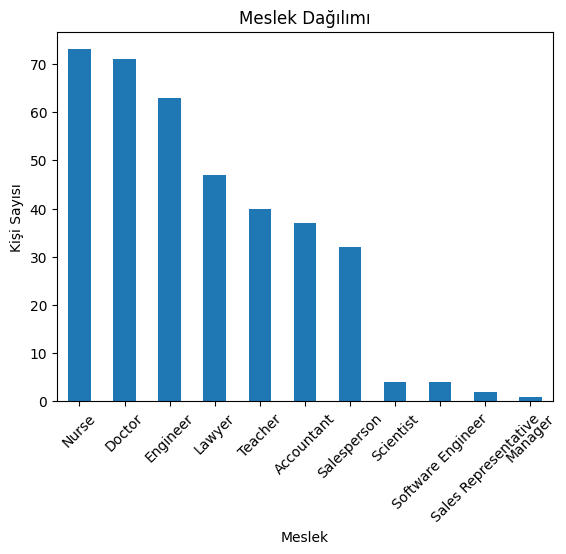

In [ ]:
# Kategorik sütun: Barplot
df['Occupation'].value_counts().plot(kind='bar')
plt.title('Meslek Dağılımı')
plt.xlabel('Meslek')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)
plt.show()

iki değişkenli analiz

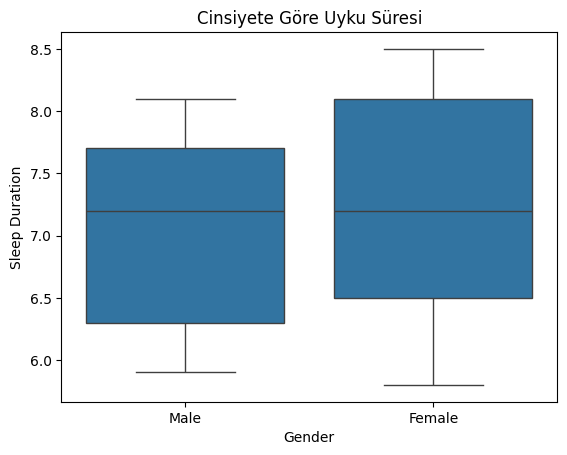

In [ ]:
# Sayısal ve kategorik değişken ilişkisi: boxplot
sns.boxplot(x='Gender', y='Sleep Duration', data=df)
plt.title('Cinsiyete Göre Uyku Süresi')
plt.show()

çok değişkenli analiz

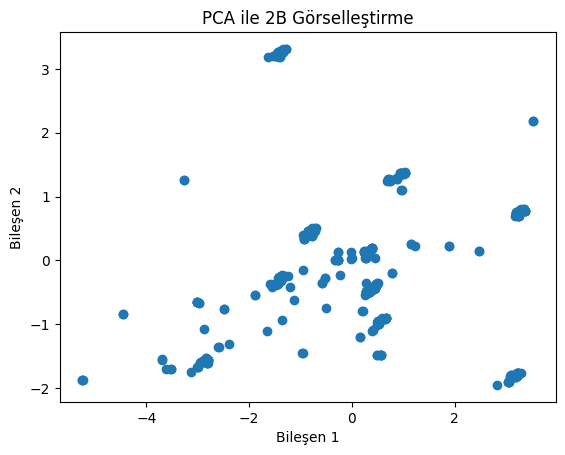

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# PCA için sayısal veriler
numeric_df = df.select_dtypes(include='number').dropna()
scaled = StandardScaler().fit_transform(numeric_df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# PCA sonucunu scatterplot ile görselleştirme
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA ile 2B Görselleştirme')
plt.xlabel('Bileşen 1')
plt.ylabel('Bileşen 2')
plt.show()